In [2]:
from pyvis.network import Network
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(0)

In [2]:
#Takes a csv describing the network and plots it.
def plot_full_network(df):
    net = Network(bgcolor='#ffffff', notebook = True)
    layer_num = 0
    old_leng = 0
    for ind, leng, lab in zip(df['index'].values, df['length'].values, df['function'].values):
        for i in range(leng):
            net.add_node(i + layer_num, label=lab + '_' + str(i + 1),
                         x=500. * ind,y=100. * (i - (leng -1)/2)) # node id = 1 and label = Node 1
            if(ind > 0):
                for j in range(df['length'].values[ind - 1]):
                    net.add_edge(layer_num + i , layer_num - j -1,
                                 title = 'W^('+str(ind-1) + ')_{' + str(old_leng - j) + ',' + str(i+1) + '}') 
        layer_num += int(leng)
        old_leng = leng
    net.toggle_physics(False)
    net.toggle_drag_nodes(False)
    return net

def plot_partial_network(df):
    net = Network(bgcolor='#ffffff', notebook = True)
    layer_num = 0
    old_leng = 0
    for ind, leng, lab in zip(df['index'].values, df['length'].values, df['function'].values):
        if leng >= 3:
            net.add_node(layer_num + 0, label=lab + '_' +  str(1),
                    x=150. * ind,y=100 * (0 - 3/2) , color ='#dd4b39') # node id = 1 and label = Node 1
            net.add_node(layer_num + 1, label=lab + '_'+ str(2),
                    x=150. * ind,y=100. * (1  - 3/2), color ='#dd4b39') # node id = 1 and label = Node 1
            net.add_node(layer_num + 2, label='...',
                    x=150. * ind,y=100. * (2 - 3/2), shape = 'ellipse', color ='#ffff') # node id = 1 and label = Node 1
            net.add_node(layer_num + 3, label=lab+ '_' + 'N',
                    x=150. * ind,y=100. * (3 - 3/2) , color ='#dd4b39') # node id = 1 and label = Node 1
            leng = 4
        else:
            for i in range(leng):
                net.add_node(i + layer_num, label=lab + '_' + str(i+1),
                             x=150. * ind,y=100. *  (i - (leng -1)/2) , color ='#dd4b39') # node id = 1 and label = Node 1
        if(ind > 0):
            for i in range(leng): 
                for j in range(old_leng):
                    lab = 'W^(' + str(ind - 1) + ')_{'
                    if old_leng - j -1 == 2:
                        lab += '...,'
                    elif old_leng - j -1 == 3:
                        lab += 'N' + ','
                    else: lab += str(old_leng - j) + ','
                    if i == 2:
                        lab += '...}'
                    elif i == 3:
                        lab += 'N' + '}'
                    else: lab += str(i+1) + '}'
                    net.add_edge(layer_num + i , layer_num - j -1, color ='#dd4b39', title = lab)
        old_leng = leng
        layer_num += int(leng)
    net.toggle_physics(False)
    net.toggle_drag_nodes(False)
    return net

In [3]:
net = plot_full_network(pd.read_csv('big_network.csv'))
net.show('mygraph_full_'+ '.html')

# Other resources

Free online book on neural networks and deep learning, contains examples and basic code : http://neuralnetworksanddeeplearning.com/index.html 

# Linear Regression

In [4]:
net = plot_partial_network(pd.read_csv('linear_reg.csv'))
net.show('mygraph_full_'  + '.html')

Want to model an input dataset $X = (\vec{x}^{(1)}, \vec{x}^{(2)} , ... ,\vec{x}^{(M)})$, where $\vec{x}^{(i)} = (x_1^{(i)}, x_2^{(i)}, ... ,x_N^{(i)} ) $,  to it's known output $\tilde{Y} = (\tilde{y}^{(1)},\tilde{y}^{(2)},...,\tilde{y}^{(M)})$. 

Try modelling linearly...
\begin{equation}
    \label{eqn:LinearRegression_output}
     y^{(i)} = y(\vec{w}, b; \vec{x}^{(i)}) = \vec{w} \cdot \vec{x}^{(i)} + b
\end{equation}
for a set of weights $\vec{w} = (w_1, w_2, ... ,w_N )$.

Want to find $\vec{w}$ such that it best models the data. If we select random weights. How do we know how well this moedls the data ... 

Need to quantify how well it models the data ...
Introduce the RMSE loss function
\begin{equation}
    \label{eqn:RMSE_Loss}
     \mathcal{L}[Y,\tilde{Y}] = \frac{1}{2M}\sum_{i=1}^M (y^{(i)} - \tilde{y}^{(i)})^2
\end{equation}
In this simple case can simply choose the best value for the weights and bias by solving the equation ....

\begin{equation}
    \label{eqn:global_minima}
     \frac{\partial\mathcal{L}[Y,\tilde{Y}]}{\partial w_j} = 0; \quad \frac{\partial\mathcal{L}[Y,\tilde{Y}]}{\partial b} = 0;
\end{equation}

However, in order to allow for a generalisation will try to estimate the best values of the weights by iteratively changing the weights and bias by following the path of steepest descent through the loss function plane...

If we change the weights and bias by $\vec{w} \to \vec{w}' = \vec{w} + \Delta\vec{w}$ and $b \to b' = b + \Delta b$, the corresponding change in the loss function approximately given by...
\begin{equation}
    \label{eqn:dLoss_linear}
\Delta\mathcal{L}[Y,\tilde{Y}]\approx \sum_{j=1}^N \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial w_j} \Delta w_j +   \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial b} \Delta b = \frac{1}{M}\sum_{i=1}^M (y^{(i)} - \tilde{y}^{(i)})\left(\sum_{j=1}^N x^{(i)}_j \Delta w_j + \Delta b \right)
\end{equation}
Can ensure we will move in a direction to reduce the loss function by choosing 
\begin{equation}
     \Delta w_j = -\eta  \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{{\partial w_j}} = -\frac{\eta}{M} \sum_{i=1}^M x_j^{(i)} (y^{(i)} - \tilde{y}^{(i)}) \qquad 
     \Delta b = -\eta  \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{{\partial b}} = -\frac{\eta}{M} \sum_{i=1}^M (y^{(i)} - \tilde{y}^{(i)}) 
\end{equation}
where $\eta$ is an arbitrary small parameter. For sufficiently small $\eta$ the change in the loss function can be approximated as
\begin{equation}
    \label{eqn:dLoss_linear_eta}
\Delta\mathcal{L}[Y,\tilde{Y}]\approx - \sum_{j=1}^N \left| \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial w_j}\right|^2 \eta -   \left|\frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial b} \right|^2 \eta  = - \left [ \frac{1}{M^2}\sum_{i=1}^M \left| y^{(i)} - \tilde{y}^{(i)} \right|^2 \left(\left|\sum_{j=1}^N  x^{(i)}_j \right|^2 + 1 \right) \right]\eta
\end{equation}
as we are considering $\eta$ to be positive and are taking the absolute value squared of the rest we see that the change will always be strickly negative, therefore we will continually reduce the loss function, improving the quality of the network. 

### Example code

In [4]:
class linear_regression:
    def __init__(self, x, y, eta):
        self.w = np.random.rand(x.shape[1])*2 - 1
        self.b = np.random.rand(1)*2 - 1
        self.x = x
        self.y_test = y
        self.eta = eta
        self.L_train = []
        
    def calc_y(self, x = []):
        if (len(x)==0):x = self.x 
        return np.sum(self.w*x, axis = 1) + self.b

    def calc_dL_dy(self): 
        return (1/len(self.y_test)) * (self.calc_y() - self.y_test)

    def calc_dy_dw(self):
        return  self.x.T

    def calc_dy_db(self):
        return 1.

    def calc_L(self):
        return (1/len(self.y_test)) * sum((self.calc_y() - self.y_test) ** 2)

    def single_update(self):
        #individual update of the weights and biases using gradient descent
        dL_dw = np.sum((self.calc_dy_dw() * self.calc_dL_dy()),axis = 1) #sum is over the samples
        dL_db = np.sum(self.calc_dL_dy() * self.calc_dy_db())
        self.w -= self.eta*dL_dw / (self.x.shape[1]) #term at the end regularises for larger N
        self.b -= self.eta*dL_db
    
    def full_update(self, iterations):
        if(len(self.L_train)==0): self.L_train.append(self.calc_L()) 
        #full training, repeats process N times
        for i in range(iterations):
            self.single_update()
            self.L_train.append(self.calc_L())
    
    def plot_train(self):
        print(len(self.L_train))
        plt.figure()
        plt.plot(self.L_train)
        plt.xlabel('Epoch')
        plt.ylabel('RMSE error')
        plt.show()


In the update of the weights a regularisation factor has been added to avoid problems when N is large. 

The above code creates a class for the linear regression. It contains information on the weights and bias, the training data as well as some information on the training.

#### 1 dimensional input

In [24]:
x = np.random.rand(100,1)
w = np.random.rand(x.shape[1])*2 - 1
b = np.random.rand(1)*2 - 1
y = np.sum(w*x,axis = 1) + b + np.random.uniform(-0.04,0.04, (x.shape[0]))

Initial guess w  = [0.35075065] , initial guess b  = [-0.89116755]
Actual w   = [0.79251277] , actual b   = [0.50980851]
Measured w = [0.79028775] , measured b = [0.51024304]
51


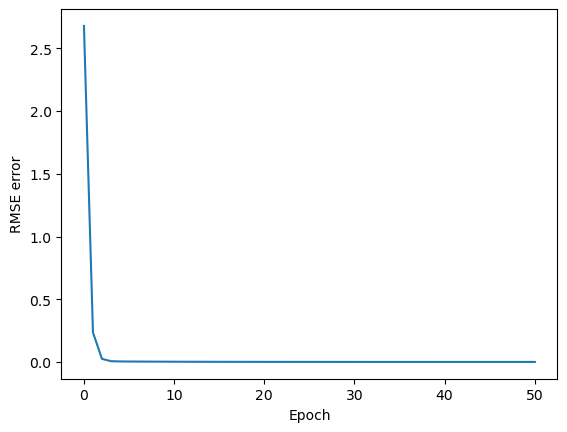

In [25]:
lin_reg = linear_regression(x,y,1)
print('Initial guess w  =' ,lin_reg.w , ', initial guess b  =', lin_reg.b)
print('Actual w   =' ,w , ', actual b   =', b)
lin_reg.full_update(50)
print('Measured w =' ,lin_reg.w , ', measured b =', lin_reg.b)
lin_reg.plot_train()

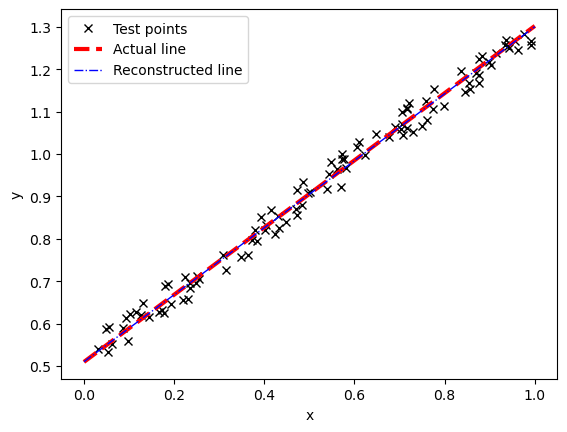

In [26]:
plt.plot(x,y, 'kx', label = 'Test points')
plt.plot([0,1], [b, w+b], 'r--', lw=3, label = 'Actual line')
x_lin = np.array([[0],[1]])
plt.plot(x_lin,lin_reg.calc_y(x_lin), 'b-.', lw=1, label = 'Reconstructed line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Gradient descent

In [5]:
np.random.seed(0)
x = np.random.rand(100,1)
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
y = np.sum(w*x,axis = 1) + b + np.random.uniform(-0.04,0.04, (x.shape[0]))
lin_reg = linear_regression(x,y,0.1)
w_run = np.array([lin_reg.w[0]]) #
b_run = np.array([lin_reg.b[0]]) # 
for i in range(5000):
    lin_reg.full_update(1)
    w_run=np.append(w_run,lin_reg.w[0])
    b_run=np.append(b_run,lin_reg.b[0])


<IPython.core.display.Javascript object>


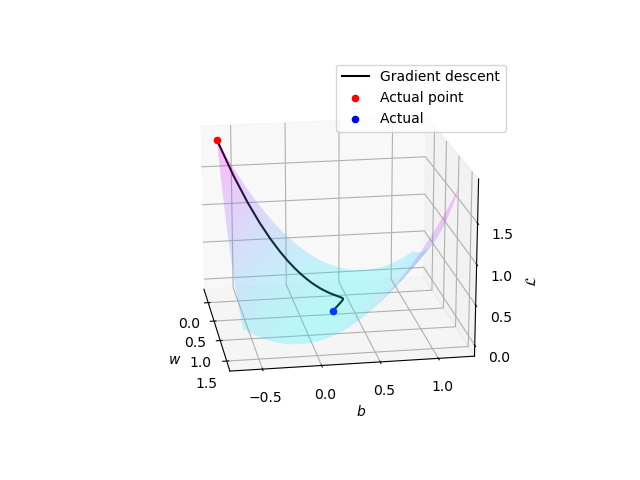

(50, 50)
Surface is the surface of loss function for different weights and biases. The red dot is the starting guess and the blue point is the actual value.


In [6]:
%matplotlib notebook
ax = plt.figure().add_subplot(projection='3d')
dw = (abs(w - w_run)).max()
wlim = [w - dw,w+dw]
db = (abs(b - b_run)).max()
blim = [b - db,b+db]
ww, bb = np.meshgrid(np.linspace(wlim[0],wlim[1],50), np.linspace(blim[0],blim[1],50), sparse=True)
yy = np.sum(np.array([(1 / len(y))* ((ww*x[i] + bb) - y[i])**2 for i in range(len(y))]),axis= 0)
print(yy.shape)
ax.plot(w_run, b_run, lin_reg.L_train, c ='k') # , c='k'
ax.scatter(w_run[0], b_run[0], lin_reg.L_train[0], c ='r') # , c='k'
ax.scatter(w, b, 0, c ='b') # , c='k'
ax.plot_surface(ww, bb, yy,cmap ='cool',  alpha=0.25) # 
ax.set_xlabel('$w$'); ax.set_ylabel('$b$'); ax.set_zlabel('$\mathcal{L}$');
ax.legend(['Gradient descent', 'Actual point', 'Actual '])
plt.show()

print('Surface is the surface of loss function for different weights and biases. The red dot is the starting guess and the blue point is the actual value.')


<img src="Learning1.gif" width="1200" align="left">

In [ ]:
%matplotlib notebook
ax = plt.figure().add_subplot(projection='3d')
dw = (abs(w - w_run)).max()
wlim = [w - dw,w+dw]
db = (abs(b - b_run)).max()
blim = [b - db,b+db]
ww, bb = np.meshgrid(np.linspace(wlim[0],wlim[1],50), np.linspace(blim[0],blim[1],50), sparse=True)
yy = np.sum(np.array([(1 / len(y))* ((ww*x[i] + bb) - y[i])**2 for i in range(len(y))]),axis= 0)
print(yy.shape)
ax.plot(w_run, b_run, lin_reg.L_train, c ='k') # , c='k'
ax.scatter(w_run[0], b_run[0], lin_reg.L_train[0], c ='r') # , c='k'
ax.scatter(w, b, 0, c ='b') # , c='k'
ax.plot_surface(ww, bb, yy,cmap ='cool',  alpha=0.25) # 
ax.set_xlabel('$w$'); ax.set_ylabel('$b$'); ax.set_zlabel('$\mathcal{L}$');
ax.legend(['Gradient descent', 'Actual point', 'Actual '])
plt.show()

#### 2D input

In [28]:
%matplotlib inline 
x = np.random.rand(100,2)
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
y = np.sum(w*x,axis = 1) + b + np.random.uniform(-0.04,0.04, (x.shape[0]))

Initial guess w  = [-0.74549893 -0.939368  ] , initial guess b  = [-0.38903387]
Actual w   = [0.36747225 0.70263297] , actual b   = [0.17385154]
Measured w = [0.35467514 0.70171197] , measured b = [0.18076592]
1001


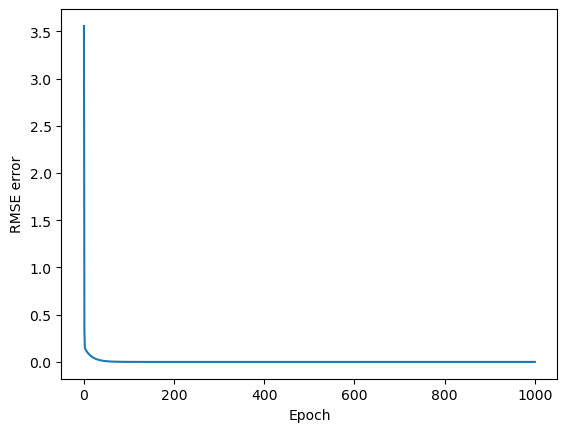

In [29]:
lin_reg = linear_regression(x,y,1)
print('Initial guess w  =' ,lin_reg.w , ', initial guess b  =', lin_reg.b)
print('Actual w   =' ,w , ', actual b   =', b)
lin_reg.full_update(1000)
print('Measured w =' ,lin_reg.w , ', measured b =', lin_reg.b)
lin_reg.plot_train()

<IPython.core.display.Javascript object>


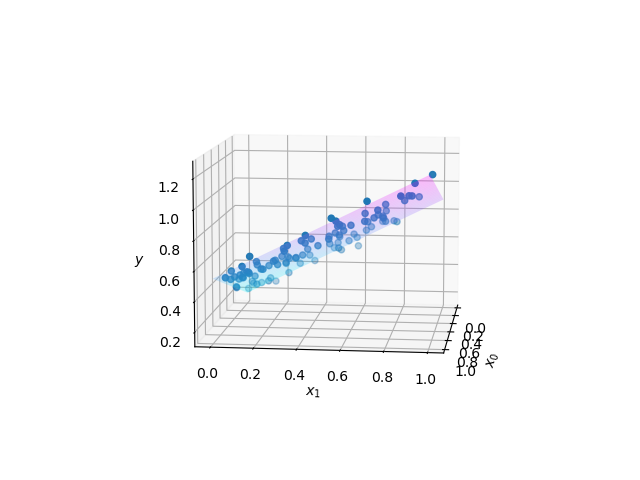

The surface shows the y using the estimated weights and bias from linear regression, the dots are the test set.


In [30]:
%matplotlib notebook
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x[:,0], x[:,1], y, cmap ='cool') # , c='k'
xx, yy = np.meshgrid(np.linspace(0,1,20), np.linspace(0,1,20), sparse=True)
y_surf = lin_reg.w[0]*xx + lin_reg.w[1]*yy + lin_reg.b 
ax.plot_surface(xx, yy, y_surf,cmap ='cool',  alpha=0.25) # 
ax.set_xlabel('$x_0$'); ax.set_ylabel('$x_1$'); ax.set_zlabel('$y$');
plt.show()
print('The surface shows the y using the estimated weights and bias from linear regression, the dots are the test set.')

Difficult to plot for N > 2.

In [31]:
%matplotlib inline 
x = np.random.rand(1000,10)
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
y = np.sum(w*x,axis = 1) + b + np.random.uniform(-0.04,0.04, (x.shape[0]))

Initial guess w  = [-0.25513133  0.30797391 -0.17013314 -0.61011476 -0.36442811  0.29341904
 -0.46415961  0.15828491  0.09336516  0.12972671] , initial guess b  = [0.96699784]
Actual w   = [0.56709744 0.6180399  0.69301244 0.16034126 0.14636742 0.48497579
 0.15302287 0.01202881 0.47918108 0.10075263] , actual b   = [0.26572885]
Measured w = [0.56576529 0.61840342 0.69260666 0.15900211 0.14950699 0.48394425
 0.15713918 0.01170325 0.48239485 0.0989818 ] , measured b = [0.26277745]
1001


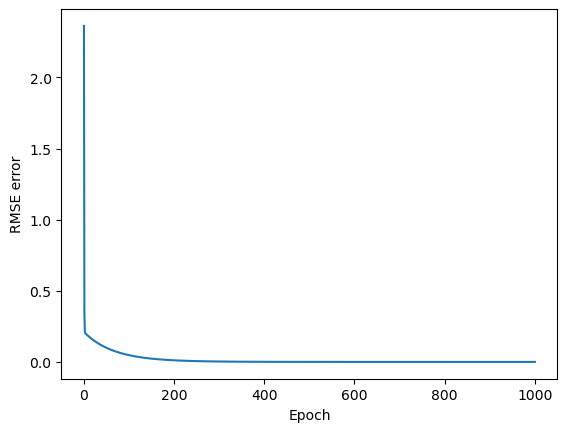

In [32]:
lin_reg = linear_regression(x,y,1)
print('Initial guess w  =' ,lin_reg.w , ', initial guess b  =', lin_reg.b)
print('Actual w   =' ,w , ', actual b   =', b)
lin_reg.full_update(1000)
print('Measured w =' ,lin_reg.w , ', measured b =', lin_reg.b)
lin_reg.plot_train()

#### Real data example?

### General activation function

Linear equation may not accurately model the data try different function... 
\begin{equation}
    \label{eqn:Regression_output}
     y^{(i)} = y(\vec{w}, b; \vec{x}^{(i)}) = f(\vec{w} \cdot \vec{x}^{(i)} + b)= f(z^{(i)})
\end{equation}

Want to find the affects of a small change in the weights and biases on the loss function...
\begin{equation}
    \label{eqn:dLoss_general}
     \Delta\mathcal{L}[Y,\tilde{Y}]\approx \sum_{j=1}^N \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial w_j} \Delta w_j +   \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial b} \Delta b  = 
     \sum_{i=1}^{M}\frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial y^{(i)}} \frac{\partial y^{(i)}}{\partial z^{(i)}} \left( \sum_{j=1}^N x_j \Delta w_j +  \Delta b \right) = \sum_{i=1}^{M} \left( \sum_{j=1}^N x_j^{(i)} \Delta w_j +  \Delta b \right)\delta ^{(i)} 
\end{equation}
where $\delta$ is the error function. This will be used more later when we discuss the backpropagation algorthim. It is defined as
\begin{equation}
    \label{eqn:error}
     \delta ^{(i)} =  \frac{\partial\mathcal{L}[Y,\tilde{Y}]}{\partial z^{(i)}} =  \frac{\partial\mathcal{L}[Y,\tilde{Y}]}{\partial y^{(i)}} \frac{\partial y^{(i)}}{\partial z^{(i)}} 
\end{equation}
Choose to change the weights and bias such that the loss function is reduced. Can do this simply by choosing the change in weights and biases to be
\begin{equation}
     \Delta w_j = -\eta  \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial w_j} = -\eta \sum_{i=1}^M x_j^{(i)} \delta^{(i)} \qquad 
     \Delta b = -\eta  \frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial b} = -\eta \sum_{i=1}^M \delta^{(i)} 
\end{equation}
such that, for an arbirary small parameter $\eta$, the change in the loss function becomes
\begin{equation}
    \label{eqn:dLoss_general_eta}
\Delta\mathcal{L} \approx   - \left|\frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial w_j}\right|^2 \eta - \left|\frac{\partial \mathcal{L}[Y,\tilde{Y}]}{\partial b}\right|^2 \eta = -\sum_{i=1}^{M} \left( \sum_{j=1}^N \left|x_j^{(i)}\right|^2 +  1 \right)\left|\delta ^{(i)}\right|^2\eta .
\end{equation}
This will therefore lead to a smaller loss value. Add diagram of ball rolling down hill, the classic and description of ball rolling down a hill, path of steepest descent ....


In [33]:
class single_node:
    def __init__(self, x, y, eta, activation):
        self.w = np.random.rand(x.shape[1])*2 - 1
        self.b = np.random.rand(1)*2 - 1
        self.x = x
        self.y_test = y
        self.eta = eta
        self.L_train = []
        self.activation = activation
    
    def calc_z(self, x = []):
        if(len(x) == 0): x = self.x
        return np.sum(self.w*x, axis = 1) + self.b

    def calc_y(self, x = []):
        if(len(x) == 0): x = self.x
        if(self.activation == "tanh"):
            y = np.tanh(self.calc_z(x))
        elif(self.activation == "sigmoid"):
            y = 1 / (1 + np.exp(-self.calc_z(x))) 
        else:
            y = self.calc_z(x)
        return y
    
    def calc_dy_dz(self):
        if(self.activation == "tanh"):
            dy_dz = 1 - (np.tanh(self.calc_z())**2.)
        elif(self.activation == "sigmoid"):
            dy_dz = self.calc_y() * (1 - self.calc_y())
        else:
            dy_dz = np.ones_like(self.calc_y())
        return dy_dz
    
    def calc_dL_dy(self):
        return (1/len(self.y_test)) * (self.calc_y() - self.y_test)

    def error_function(self):
        return self.calc_dL_dy() * self.calc_dy_dz()
     
    def calc_dz_dw(self):
        return  self.x.T  

    def calc_dz_db(self):
        return 1.

    def calc_L(self): 
        return (1/len(self.y_test)) * sum((self.calc_y() - self.y_test) ** 2)

    def single_update(self):
        #individual update of the weights and biases using gradient descent
        delta = self.error_function()
        dL_dw = np.sum(self.calc_dz_dw() * delta ,axis = 1) #sum is over the samples
        dL_db = np.sum( self.calc_dz_db() * delta)
        self.w -= self.eta*dL_dw#dL_dw should be same shape as w 
        self.b -= self.eta*dL_db
        
    def full_update(self, iterations):
        #full training, repeats process N times
        for i in range(iterations):
            self.single_update()
            self.L_train.append(self.calc_L())
    
    def plot_train(self):
        plt.plot(np.arange(len(self.L_train)),self.L_train)
        plt.xlabel('Epoch')
        plt.ylabel('RMSE error')
        plt.show()

Initial guess w  = [0.95931109] , initial guess b  = [0.67787399]
Actual w   = [-0.30127401] , actual b   = [-0.57243575]
Measured w = [-0.30645288] , measured b = [-0.56870862]


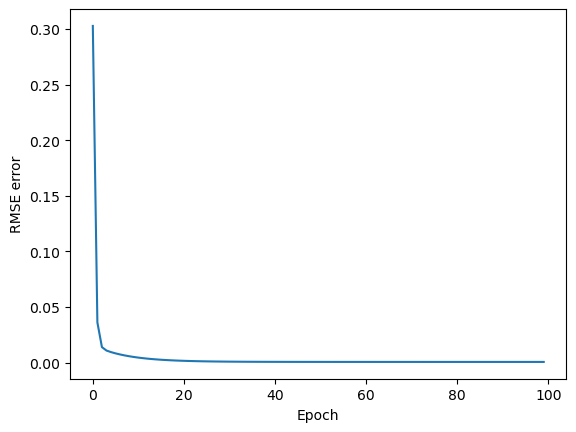

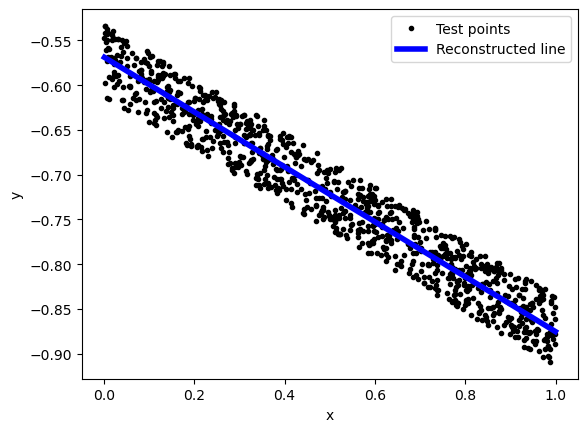

In [34]:
%matplotlib inline 
x = np.random.rand(1000,1)#* 16 - 8
w = np.random.rand(x.shape[1]) * 2 -1
b = np.random.rand(1)* 2 -1
z = np.sum(w*x,axis = 1) + b
y = z + np.random.uniform(-0.04,0.04, (x.shape[0]))# np.tanh(z)#(1 / (1 + np.exp(-z)))  # np.random.uniform(-0.0005,0.0005, (x.shape[0]))
node = single_node(x,y,1, "")
print('Initial guess w  =' ,node.w , ', initial guess b  =', node.b)
print('Actual w   =' ,w , ', actual b   =', b)
node.full_update(100)
print('Measured w =' ,node.w , ', measured b =', node.b)
node.plot_train()
plt.plot(x,y, 'k.', label = 'Test points')
x_lin = np.array([np.linspace(x.min(), x.max(), 100)]).T
plt.plot(x_lin,node.calc_y(x_lin), 'b-', lw=4, label = 'Reconstructed line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Initial guess w  = [0.389782] , initial guess b  = [0.91722226]
Actual w   = [0.73654102] , actual b   = [0.33609483]
Measured w = [0.74073836] , measured b = [0.33285823]


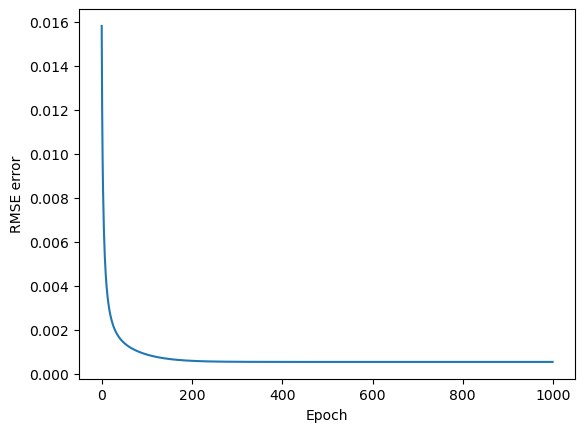

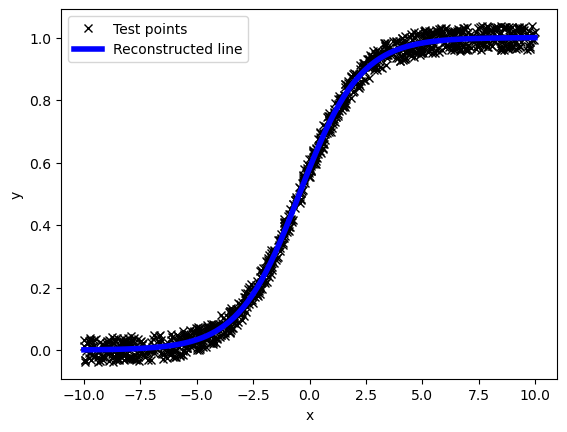

In [35]:
x = np.random.rand(1000,1)* 20 - 10
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
z = np.sum(w*x,axis = 1) + b 
y = (1 / (1 + np.exp(-z)))  + np.random.uniform(-0.04,0.04, (x.shape[0])) # np.random.uniform(-0.0005,0.0005, (x.shape[0]))
node = single_node(x,y,1, "sigmoid")
print('Initial guess w  =' ,node.w , ', initial guess b  =', node.b)
print('Actual w   =' ,w , ', actual b   =', b)
node.full_update(1000)
print('Measured w =' ,node.w , ', measured b =', node.b)
node.plot_train()
plt.plot(x,y, 'kx', label = 'Test points')
x_lin = np.array([np.linspace(x.min(), x.max(), 100)]).T
plt.plot(x_lin,node.calc_y(x_lin), 'b-', lw=4, label = 'Reconstructed line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Initial guess w  = [0.08292867] , initial guess b  = [-0.74957773]
Actual w   = [0.77650049] , actual b   = [0.91609376]
Measured w = [0.77479339] , measured b = [0.91542698]


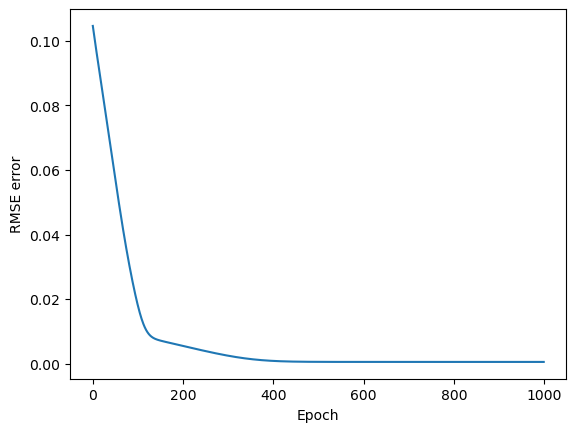

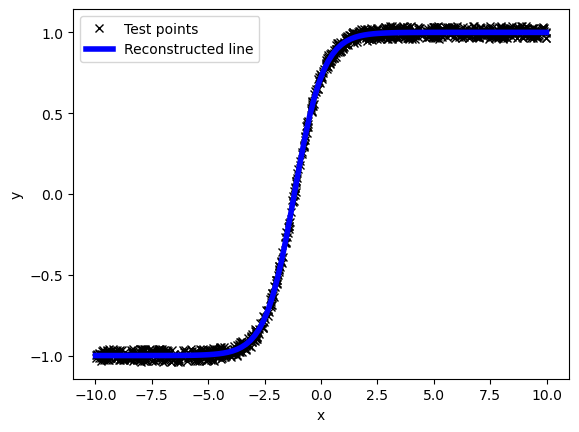

In [36]:
x = np.random.rand(1000,1)* 20 - 10
w = np.random.rand(x.shape[1])
b = np.random.rand(1)
z = np.sum(w*x,axis = 1) + b
y = np.tanh(z) + np.random.uniform(-0.04,0.04, (x.shape[0]))#(1 / (1 + np.exp(-z)))  # np.random.uniform(-0.0005,0.0005, (x.shape[0]))
node = single_node(x,y,1, "tanh")
print('Initial guess w  =' ,node.w , ', initial guess b  =', node.b)
print('Actual w   =' ,w , ', actual b   =', b)
node.full_update(1000)
print('Measured w =' ,node.w , ', measured b =', node.b)
node.plot_train()
plt.plot(x,y, 'kx', label = 'Test points')
x_lin = np.array([np.linspace(x.min(), x.max(), 100)]).T
plt.plot(x_lin,node.calc_y(x_lin), 'b-', lw=4, label = 'Reconstructed line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Examples

Hyperbolic tan loss activtion function.
\begin{equation}
    \label{eqn:tanh}
     f(\vec{w} \cdot \vec{x} + b) = \tanh(\vec{w} \cdot \vec{x} + b); \quad \frac{\partial f(\vec{w} \cdot \vec{x} + b)}{\partial w_j} =x_j(1 - tanh^2(\vec{w} \cdot \vec{x} + b)); \quad \frac{\partial f(\vec{w} \cdot \vec{x} + b)}{\partial b} = (1 - tanh^2(\vec{w} \cdot \vec{x} + b))
\end{equation}
Sigmoid function.
\begin{equation}
    \label{eqn:sigmoid}
      f(x) = \sigma(x) =\frac{1}{1 + e^{-x}}; \quad f'(x) = \sigma'(x) = \frac{e^{-x}}{(1 + e^{-x})^2} = \sigma(x)(1 - \sigma(x));
\end{equation}


Diagram of linear regression thing

## Backpropagation, or how I learned to stop worrying and love the indices

In [19]:
net = plot_partial_network(pd.read_csv('classification.csv'))
net.show('mygraph_full_'  + '.html')

## Multiple hidden layers the same but with more indices

In [20]:
net = plot_partial_network(pd.read_csv('hidden.csv'))
net.show('mygraph_full_'  + '.html')

In [37]:
class neural_net:
    def __init__(self,eta, architecture, activation, l2 = 0):
        self.architecture = architecture 
        self.activation = activation
        self.num_layers = len(architecture)
        print(activation, architecture, len(architecture))
        self.w = [(np.random.rand(architecture[i-1], architecture[i]) *2 - 1) for i in range(1, self.num_layers)]
        self.b = [(np.random.rand(architecture[i])*2 - 1) for i in range(1, self.num_layers)]
        self.eta = eta
        self.l2 = l2

    def calc_z(self, a, layer = 1):
        try: 
            #self.w[layer - 1]
            a[layer-1]
        except:
            print(layer)
            print(a)
        return np.sum(self.w[layer - 1].T * a[layer-1], axis = 1) + self.b[layer - 1] 
   
    def calc_a(self, a, layer = 1):
        if(layer < 1): layer = 1
        if(self.activation[layer] == "tanh"):
            a_layer = np.tanh(self.calc_z(a, layer))
        elif(self.activation[layer] == "sigmoid"):
            a_layer = 1 / (1 + np.exp(-self.calc_z(a , layer))) 
        else:
            a_layer = self.calc_z(a, layer)
        return a_layer
    
    def calc_da_dz(self, a , layer = 1):
        if(layer < 1): layer = 1
        if(self.activation == "tanh"):
            dy_dz = 1 - (self.calc_a(a , layer)**2.)
        elif(self.activation == "sigmoid"):
            dy_dz = self.calc_a(a , layer) * (1 - self.calc_a(a , layer))
        else:
            dy_dz = np.ones_like(self.calc_a(a , layer))
        return dy_dz
    
    def calc_dz_da(self, x , layer = 1):
        return self.w[layer-1]
       
    def calc_dz_dw(self, x):
        return x.T
    
    def calc_dz_db(self, x):
        return np.ones_like(x.T)
    
    def calc_dL_daL(self, aL, y):
        return  (1/ len(y)) * (aL - y)
    
    def calc_L(self, aL, y):
        return (1/2) * np.mean((aL - y)**2.)

    
    def forward_prop(self, x):
        a = [np.zeros(self.architecture[j]) for j in range(self.num_layers)]
        a[0] = x
        for layer in range(1, self.num_layers): 
            a[layer] = self.calc_a(a, layer)
        return a
    
    def forward_prop_set(self, x):
        output = []
        for sample in range(x.shape[0]):
            output.append(self.forward_prop(x[sample])[-1])
        return np.array(output)
        
    def back_prop(self, a, y):
        delta = [np.zeros(s) for s in self.architecture]
        for end_node in range(self.architecture[-1]):
            delta[-1] = self.calc_dL_daL(a[-1], y) * self.calc_da_dz(a, layer=len(a)-1)
        for layer in range(self.num_layers-2,0, -1):
            for node in range(self.architecture[layer]):
                delta[layer] = np.sum((self.calc_dz_da(a, layer + 1) * delta[layer + 1]).T *self.calc_da_dz(a , layer),axis=0)
        return delta
    
    def single_epoch(self,training_x, training_y):
        n_samples = training_x.shape[0]
        dw = [np.zeros_like(self.w[i]) for i in range(0, self.num_layers - 1)]
        db = [np.zeros_like(self.b[i]) for i in range(0, self.num_layers - 1)]
        for sample in range(n_samples):
            a = self.forward_prop(training_x[sample])
            delta = self.back_prop(a, training_y[sample])
            for layer in range(1, self.num_layers):
                dw[layer-1] += (np.array([a[layer-1]]).T * delta[layer]) #/ n_samples
                db[layer-1] += (delta[layer]) #/ n_samples
        for layer in range(1, self.num_layers):
            self.w[layer-1] = self.w[layer-1]*(1 - (self.eta*self.l2 / n_samples)) - (self.eta * dw[layer-1]/ n_samples) 
            self.b[layer-1] -= self.eta * db[layer-1]/ n_samples

    def full_training(self, training_x, training_y,testing_x, testing_y, n_epochs):
        L_training = [self.calc_L(self.forward_prop_set(training_x), training_y)]
        L_testing = [self.calc_L(self.forward_prop_set(testing_x), testing_y)]
        for epoch in range(n_epochs):
            self.single_epoch(training_x, training_y)
            L_training.append(self.calc_L(self.forward_prop_set(training_x), training_y))
            L_testing.append(self.calc_L(self.forward_prop_set(testing_x), testing_y))
        return L_training, L_testing
    
    def stochastic_training(self, training_x, training_y,testing_x, testing_y, n_epochs, n_batches):
        n_training = len(training_x)
        if n_batches > n_training: n_batches = n_training
        if (n_training%n_batches!= 0): n_batches = n_training
        batch_size = int(n_training/n_batches)
        L_training = [self.calc_L(self.forward_prop_set(training_x), training_y)]
        L_testing = [self.calc_L(self.forward_prop_set(testing_x), testing_y)]
        inds = np.arange(n_training)
        print('Batch size = ', batch_size)
        print('n_batches = ', n_batches)
        for epoch in range(n_epochs):
            print('Epoch',epoch, 'L_testing :', L_testing[-1])
            np.random.shuffle(inds);
            training_x = training_x[inds]; training_y = training_y[inds]
            for n in range(n_batches):
                self.single_epoch(training_x[n*batch_size: (n+1)*batch_size], training_y[n*batch_size: (n+1)*batch_size])
            training_aL = self.forward_prop_set(training_x)
            L_training.append(self.calc_L(training_aL, training_y))
            testing_aL = self.forward_prop_set(testing_x)
            L_testing.append(self.calc_L(testing_aL, testing_y))
            print('Train prob:',100 *(np.floor(training_aL.T /  training_aL.max(axis = 1)).T * training_y).sum() / len(training_aL),'%. Test prob:',100 * (np.floor(testing_aL.T /  testing_aL.max(axis = 1)).T * testing_y).sum() / len(testing_aL),'%')
        return L_training, L_testing
            

['Input', 'tanh', 'sigmoid'] [1, 3, 1] 3
['Input', 'sigmoid', 'sigmoid', 'sigmoid'] [1, 20, 10, 1] 4
[array([[ 0.17451841, -0.51676019,  0.41856659, -0.9724395 ,  0.60177955,
        -0.14306679, -0.48456484, -0.76531696, -0.56233281,  0.81304264,
        -0.63420462, -0.73539672, -0.00857162, -0.77470534,  0.40425925,
        -0.16021618,  0.36245919,  0.20920881, -0.44359048,  0.16768011]]), array([[-0.77572533,  0.45133877, -0.21339014, -0.08055479,  0.44533981,
        -0.83758889, -0.29866203, -0.03781475, -0.50286898, -0.41342644],
       [ 0.28164482, -0.81709153,  0.08815326,  0.80297495, -0.27900414,
         0.88971262, -0.96046984, -0.37162435, -0.29172931,  0.09132029],
       [ 0.64902379,  0.00152655,  0.57146254, -0.5148465 ,  0.20204076,
        -0.91972273, -0.62637623, -0.86325895,  0.05187409,  0.37382474],
       [ 0.65102014,  0.91407222,  0.91511764, -0.36879269, -0.2616892 ,
        -0.14170195, -0.81024143, -0.76430597,  0.06208273, -0.21877931],
       [-0.8569

Train prob: 27.980805240974426 %. Test prob: 28.287348981945215 %
Epoch 39 L_testing : 0.0011022946124064651
Train prob: 27.980805240974426 %. Test prob: 28.287348981945215 %
Epoch 40 L_testing : 0.0010844148305195398
Train prob: 27.980805240974426 %. Test prob: 28.287348981945215 %
Epoch 41 L_testing : 0.0010951333111619797
Train prob: 27.980805240974426 %. Test prob: 28.287348981945215 %
Epoch 42 L_testing : 0.001089883030905989
Train prob: 27.980805240974426 %. Test prob: 28.287348981945215 %
Epoch 43 L_testing : 0.0011910548589838816
Train prob: 27.980805240974426 %. Test prob: 28.287348981945215 %
Epoch 44 L_testing : 0.0011245567876999175
Train prob: 27.980805240974423 %. Test prob: 28.287348981945215 %
Epoch 45 L_testing : 0.0010914704186614158
Train prob: 27.980805240974426 %. Test prob: 28.287348981945215 %
Epoch 46 L_testing : 0.0011308988532761001
Train prob: 27.980805240974426 %. Test prob: 28.287348981945215 %
Epoch 47 L_testing : 0.0010457332603381606
Train prob: 27.98080

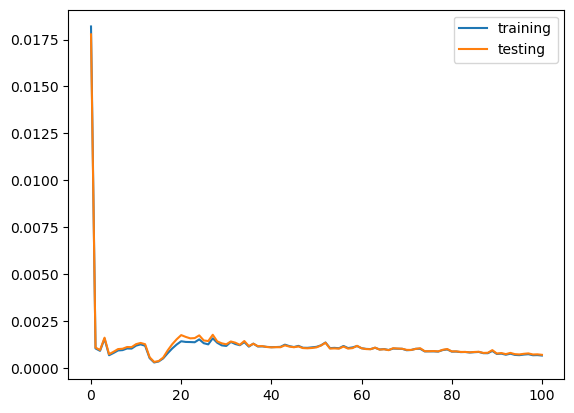

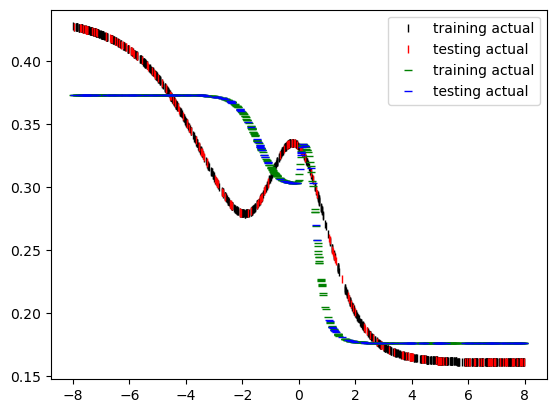

In [59]:
#%reset
%matplotlib inline 
n_samples = 1000
n_batches = 100
n_epochs = 100
test_train_split = 0.8
architecture = [1,3,1]
activation = ['Input', 'tanh', 'sigmoid']
nn_a = neural_net(0.1, architecture, activation)

x = np.random.rand(n_samples,architecture[0]) * 16 -8
y = nn_a.forward_prop_set(x)
inds = np.arange(n_samples)
np.random.shuffle(inds)
training_x = x[inds[:int(n_samples*test_train_split)]]
training_y = y[inds[:int(n_samples*test_train_split)]]
testing_x = x[inds[int(n_samples*test_train_split):]]
testing_y = y[inds[int(n_samples*test_train_split):]]



architecture_b = [1,20,10,1]
activation_b = ['Input', 'sigmoid', 'sigmoid', 'sigmoid']


nn_b = neural_net(1, architecture_b, activation_b, 0.1)
print(nn_b.w, nn_b.b)

L_training, L_testing = nn_b.stochastic_training(training_x / 8, training_y,testing_x / 8,testing_y , n_epochs, n_batches)
print(nn_a.w, nn_a.b)
print(nn_b.w, nn_b.b)

plt.plot(L_training, label = 'training')
plt.plot(L_testing, label = 'testing')
plt.legend()
plt.show()

plt.plot(training_x, training_y, 'k|', label = 'training actual')
plt.plot(testing_x, testing_y, 'r|', label = 'testing actual')
plt.plot(training_x,  nn_b.forward_prop_set(training_x/ 8), 'g_', label = 'training actual')
plt.plot(testing_x,  nn_b.forward_prop_set(testing_x/ 8 ), 'b_', label = 'testing actual')
plt.legend()
plt.show()

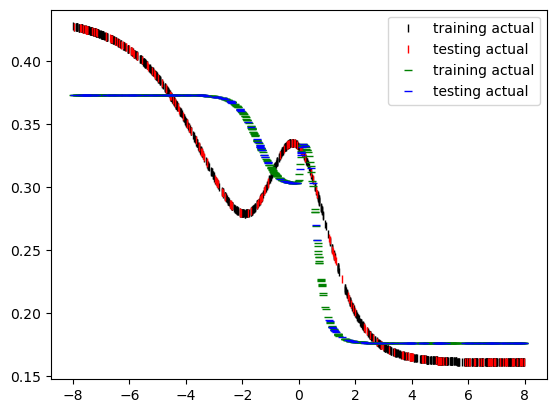

In [62]:
plt.plot(training_x, training_y, 'k|', label = 'training actual')
plt.plot(testing_x, testing_y, 'r|', label = 'testing actual')
plt.plot(training_x,  nn_b.forward_prop_set(training_x/ 8), 'g_', label = 'training actual')
plt.plot(testing_x,  nn_b.forward_prop_set(testing_x/ 8 ), 'b_', label = 'testing actual')
plt.legend()
plt.show()

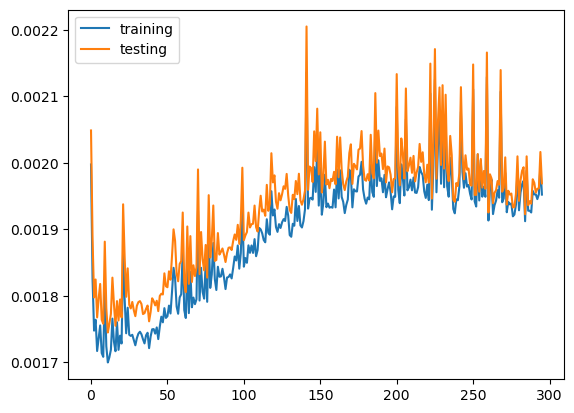

In [49]:
plt.plot(L_training[5:], label = 'training')
plt.plot(L_testing[5:], label = 'testing')
plt.legend()
plt.show()

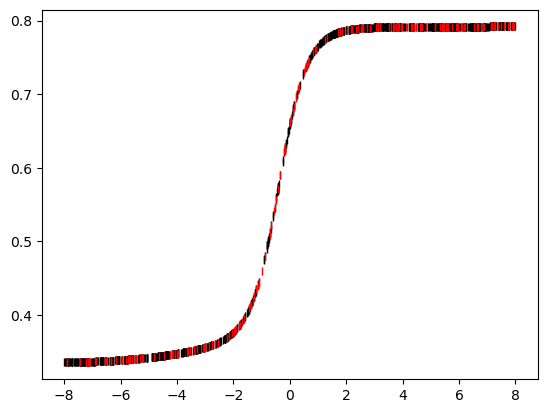

In [584]:
plt.plot(training_x, training_y, 'k|', label = 'training actual')
plt.plot(testing_x, testing_y, 'r|', label = 'testing actual')

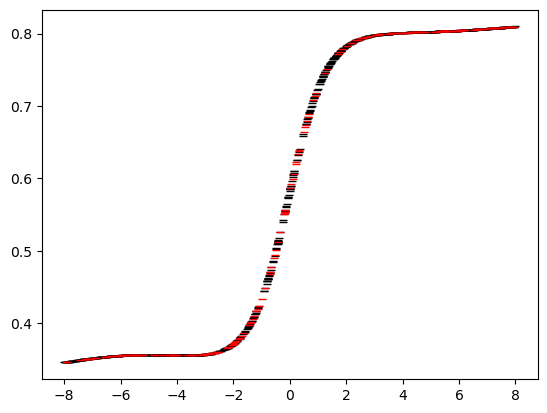

In [585]:
plt.plot(training_x,  nn_b.forward_prop_set(training_x), 'k_', label = 'training actual')
plt.plot(testing_x,  nn_b.forward_prop_set(testing_x), 'r_', label = 'testing actual')

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
n_test = x_test.shape[0]
n_train = x_train.shape[0]

im_width = x_test.shape[1]
im_height = x_test.shape[2]
x_train = x_train.reshape(n_train,im_width*im_height) / 256.
x_test = x_test.reshape(n_test,im_width*im_height) / 256.
y_train = np.array([np.arange(10) == y for y in y_train])
y_test = np.array([np.arange(10) == y for y in y_test])

In [8]:
nn_mnist = neural_net(1, [im_width * im_height,30,10], ['Input', 'sigmoid', 'sigmoid'], 0.01)

['Input', 'sigmoid', 'sigmoid'] [784, 30, 10] 3
Batch size =  100
n_batches =  100
Epoch 0 L_testing : 0.14163911530984666
Train prob: 72.58 %. Test prob: 70.5 %
Epoch 1 L_testing : 0.02648130168238678
Train prob: 78.59 %. Test prob: 75.7 %
Epoch 2 L_testing : 0.021974433388696937
Train prob: 81.06 %. Test prob: 77.5 %
Epoch 3 L_testing : 0.019841888989553587
Train prob: 82.21 %. Test prob: 79.0 %
Epoch 4 L_testing : 0.0185178315842561
Train prob: 83.05 %. Test prob: 79.8 %
Epoch 5 L_testing : 0.01776946784442018
Train prob: 83.14 %. Test prob: 79.8 %
Epoch 6 L_testing : 0.01724216527731462
Train prob: 83.43 %. Test prob: 79.4 %
Epoch 7 L_testing : 0.017001590278760564
Train prob: 83.42 %. Test prob: 79.5 %
Epoch 8 L_testing : 0.01690195670595253
Train prob: 83.09 %. Test prob: 78.1 %
Epoch 9 L_testing : 0.01673782793281557
Train prob: 83.48 %. Test prob: 79.5 %
Epoch 10 L_testing : 0.01662486819719907
Train prob: 83.66 %. Test prob: 79.5 %
Epoch 11 L_testing : 0.0165050300462865
Train

In [ ]:
aL_untrained = nn_mnist.forward_prop_set(x_test)
print('For an untrained network')
print('Test set probability :', 100*(np.floor( aL_untrained.T /  aL_untrained.max(axis = 1)).T * y_test).sum() / len(aL_untrained))
for i in range(10):
    plt.imshow(x_test[i].reshape(im_width, im_height))
    print(aL_test[i],aL_untrained[i].argmax() )
    plt.title('Guess: ' + str(aL_untrained[i].argmax())+ ' actual:'+ str(y_test[i].argmax()))
    plt.show()

In [ ]:
L_training, L_testing = nn_mnist.stochastic_training(x_train[:10000], y_train[:10000],x_test[:1000], y_test[:1000], 30, 100)

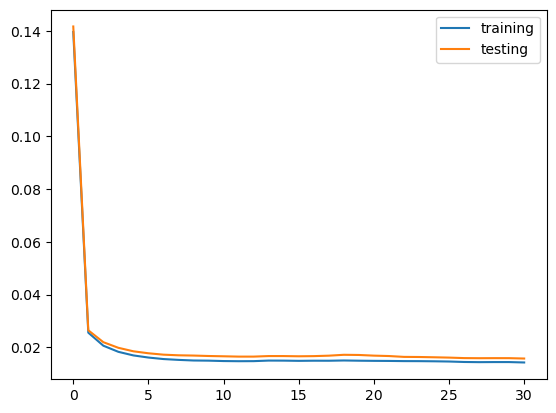

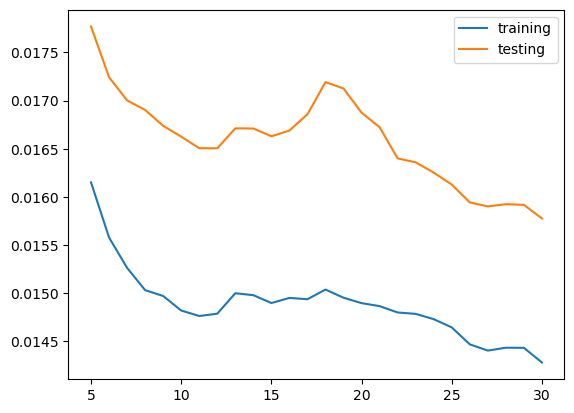

In [12]:
plt.plot(L_training, label = 'training')
plt.plot(L_testing, label = 'testing')
plt.legend()
plt.show()
plt.plot(np.arange(5,len(L_training)),L_training[5:], label = 'training')
plt.plot( np.arange(5,len(L_testing)),L_testing[5:],label = 'testing')
plt.legend()
plt.show()

For a trained network
Test set probability : 82.25 %
[9.03065391e-04 1.33066731e-03 1.16119189e-03 1.50371750e-02
 3.24495583e-02 3.72115550e-04 1.02977762e-04 9.95302469e-01
 5.46445430e-04 4.65676435e-02] 7


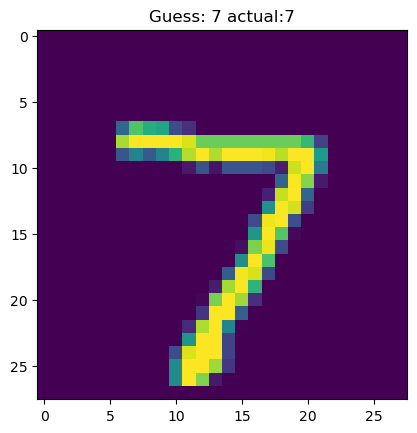

[1.83153226e-02 2.17228465e-02 4.16012199e-01 5.37368711e-01
 8.63625312e-04 2.86504042e-01 6.54048888e-02 4.59613008e-05
 2.35554548e-03 2.69526048e-04] 3


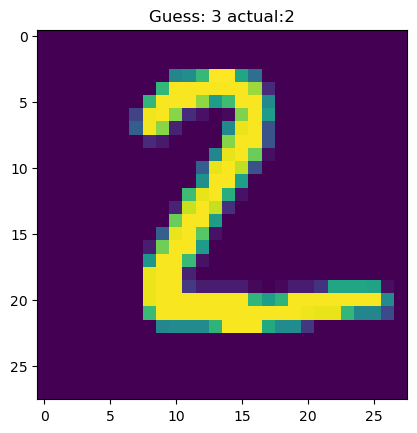

[1.90149699e-05 9.95146382e-01 2.64700762e-03 3.49186191e-03
 8.16833052e-04 3.50255032e-03 4.63245243e-03 1.72245384e-02
 6.64249904e-04 2.33607871e-03] 1


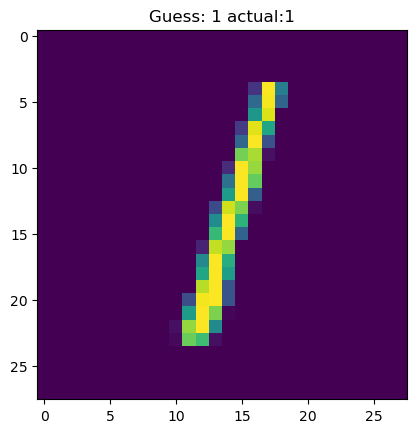

[9.38268560e-01 3.03861898e-04 7.67557110e-03 1.07591779e-02
 8.62916851e-04 3.04872003e-02 1.78035039e-02 1.52328972e-02
 1.86168404e-03 2.14518273e-02] 0


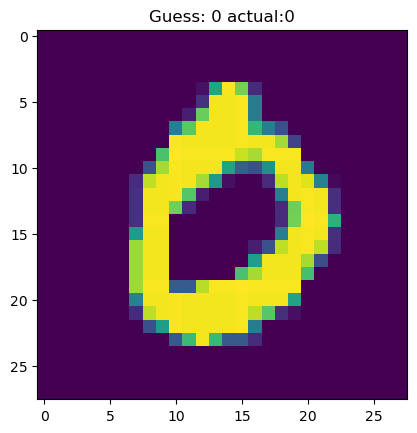

[8.11763841e-04 4.27927222e-04 5.80833549e-03 1.43696761e-02
 9.27308346e-01 4.70610615e-03 2.67730926e-03 8.64662532e-02
 9.29678320e-03 6.01618830e-02] 4


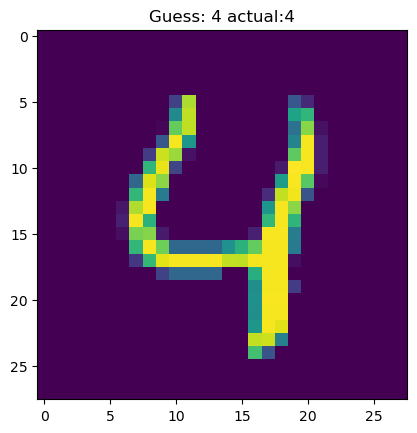

[1.70921721e-05 9.90991185e-01 2.77494295e-03 1.69793808e-03
 4.41256397e-03 4.91930788e-04 1.57218721e-03 5.95114977e-02
 1.09531984e-03 2.30863926e-02] 1


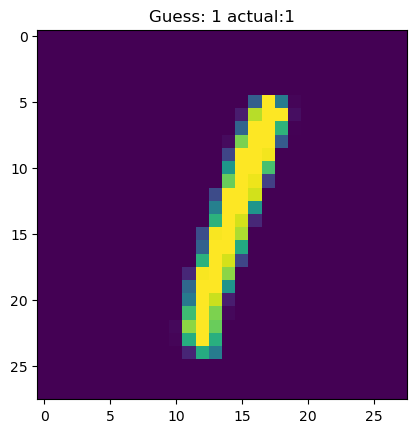

[8.44004592e-05 1.76346190e-03 2.12737185e-04 5.16136104e-03
 5.83427281e-01 2.32767239e-01 7.53552261e-04 2.14657943e-02
 8.00339259e-02 2.28451455e-01] 4


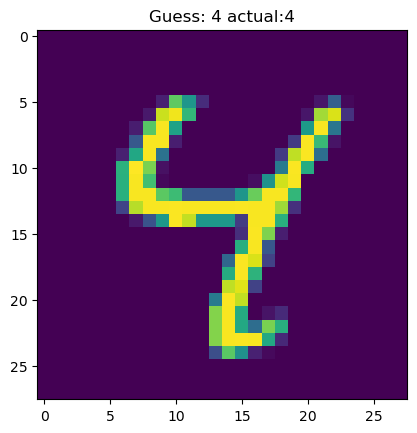

[5.95705988e-05 7.90567939e-03 7.24500120e-04 1.39559502e-02
 1.79962270e-01 1.77536576e-01 1.09610044e-02 8.81507775e-04
 2.54347296e-01 1.81387252e-01] 8


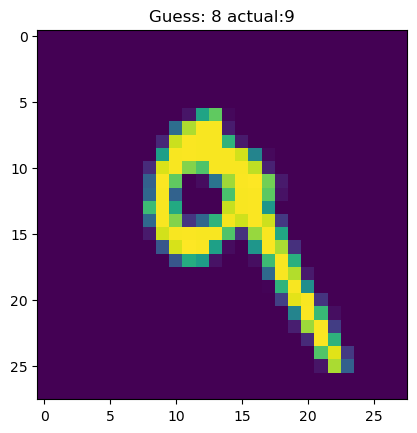

[1.95849782e-02 8.47822710e-04 4.29896584e-02 4.15973453e-04
 1.65793658e-01 1.24843613e-01 6.97604698e-01 7.07004444e-05
 8.77169193e-03 3.40527211e-03] 6


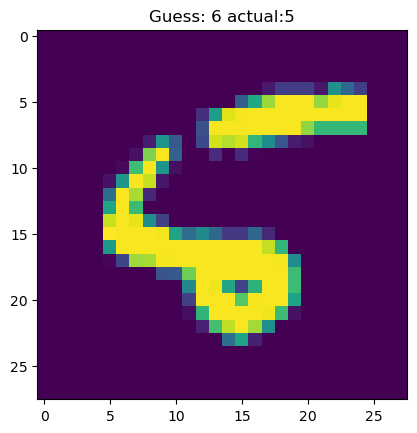

[1.70542534e-04 2.69939865e-04 2.11481883e-05 1.85519798e-04
 1.60672529e-01 7.12273462e-03 3.47421062e-04 9.30338259e-02
 9.91591937e-04 6.35630952e-01] 9


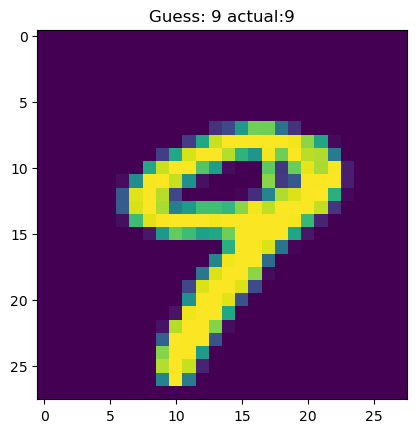

[0.76345374 0.0013381  0.01990252 0.02532997 0.00365497 0.14132497
 0.01906089 0.0019173  0.02190656 0.00163228] 0


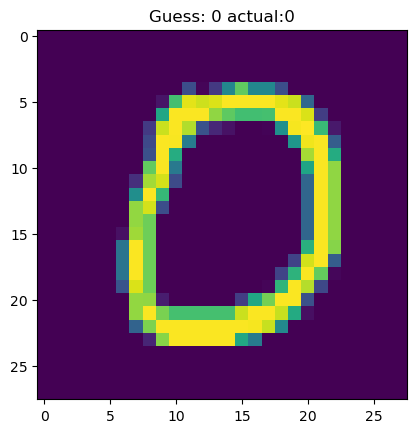

[0.05971493 0.00162608 0.09969081 0.00277256 0.01433331 0.04343416
 0.33957995 0.00061589 0.02640918 0.00212125] 6


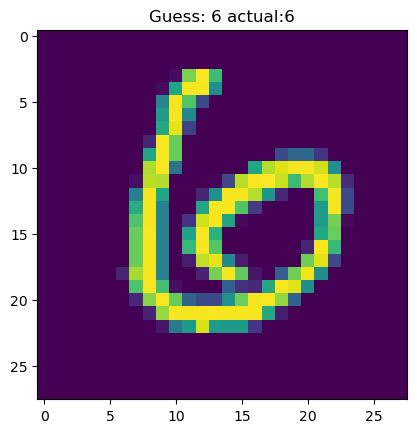

[5.17891138e-04 1.58947995e-04 6.95664177e-05 9.86633968e-04
 2.93263110e-01 2.78999539e-02 2.31647858e-04 2.04149239e-02
 4.99676264e-03 6.99105377e-01] 9


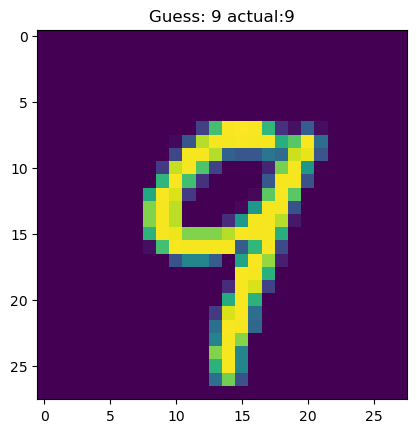

[9.80802570e-01 4.57225845e-04 1.89298487e-02 4.31951748e-03
 2.85180601e-04 1.00647773e-01 1.27708086e-02 2.55198247e-01
 4.40489592e-02 4.26202771e-02] 0


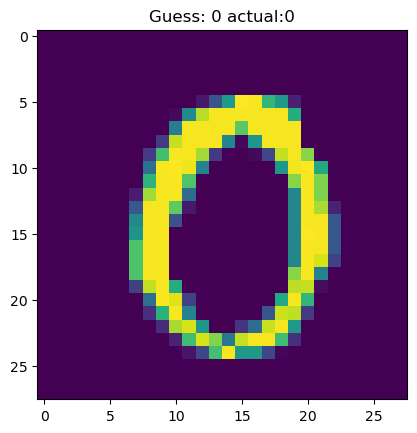

[2.86977648e-05 9.07263327e-01 1.61855031e-02 5.92291630e-02
 2.28236662e-04 1.87871054e-03 1.76248787e-02 4.08018210e-02
 2.51182849e-03 3.85885688e-03] 1


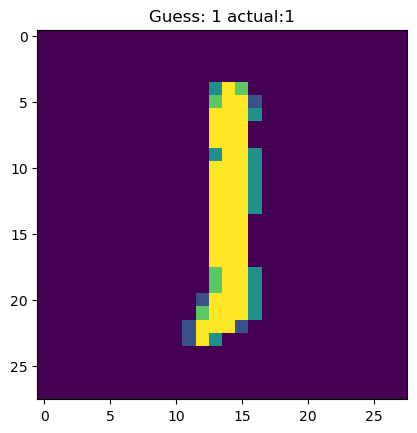

[0.0034479  0.00340661 0.00146543 0.06940889 0.01014142 0.59589323
 0.00243189 0.00097174 0.10994715 0.0015709 ] 5


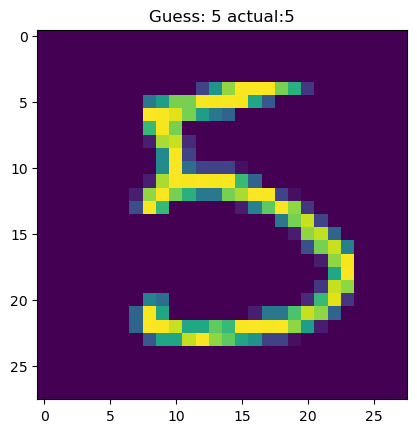

[3.30159737e-03 5.94380437e-04 7.78872639e-03 5.59063150e-02
 1.64577375e-01 1.69763029e-03 1.94757279e-04 1.00858480e-01
 1.44317631e-02 5.24933204e-01] 9


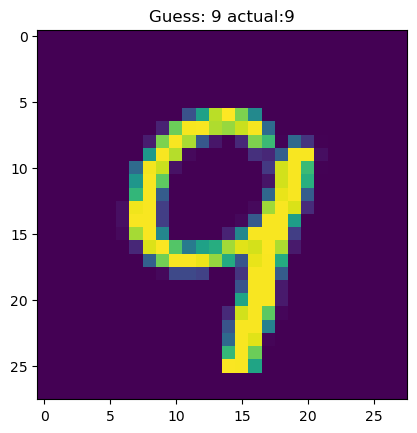

[5.51873310e-02 4.44659111e-04 5.84311434e-04 6.47013712e-01
 2.04253137e-02 5.16677039e-03 4.18104583e-05 9.24343022e-01
 2.96304586e-03 3.09010412e-02] 7


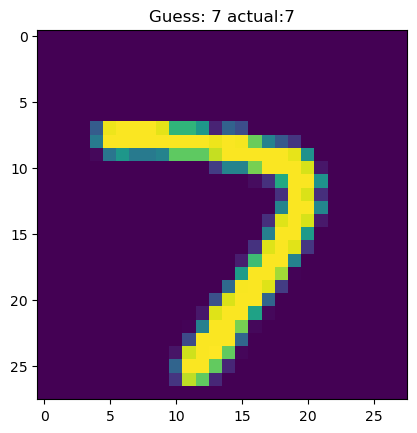

[0.01649769 0.00840022 0.0304667  0.31069968 0.00802028 0.01566738
 0.02286253 0.0013014  0.04952822 0.04966075] 3


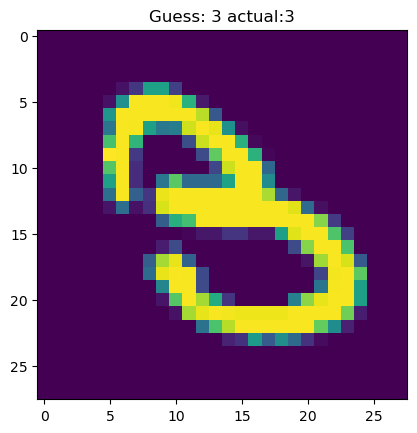

[1.96776065e-04 3.45509757e-04 1.45428910e-03 3.17650876e-03
 9.75924026e-01 9.14889844e-03 7.70174064e-03 2.29584773e-02
 5.74413546e-03 1.05943255e-01] 4


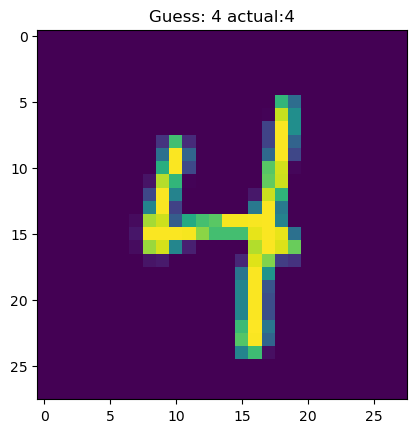

In [22]:
aL_test = nn_mnist.forward_prop_set(x_test)
print('For a trained network')
print('Test set probability :', 100*(np.floor( aL_test.T /  aL_test.max(axis = 1)).T * y_test).sum() / len(aL_test), '%')
for i in range(20):
    plt.imshow(x_test[i].reshape(im_width, im_height))
    print(aL_test[i],aL_test[i].argmax() )
    plt.title('Guess: ' + str(aL_test[i].argmax())+  ' actual:'+ str(y_test[i].argmax()))
    plt.show()


## Gradient descent

### Loss function

### Gradient descent

## Stochastic gradient descent

## Training / testing split

# Single layer neural networks

## Backpropagation algorthim

# Multi-layer networks (deep?)

# Different architectures

# NNP

# Example code to be dispersed through notes not used at moment

In [21]:
import numpy as np
from matplotlib import pyplot as plt

In [22]:
m = np.random.uniform(-10,10, (2))
c = np.random.uniform(-10,10, (1))
def f(m,c,x):
    return np.sum(m*x,axis=1) + c

def df_dx(m,c,x):
    return m

def df_dm(m,c,x):
    return x

def df_dc(m,c,x):
    return 1.
print('Want to predict the gradient: ',m,' and the intercept: ',c)

Want to predict the gradient:  [-1.51194197 -4.66736805]  and the intercept:  [2.56599398]


(100,)
(100,)
(100,)


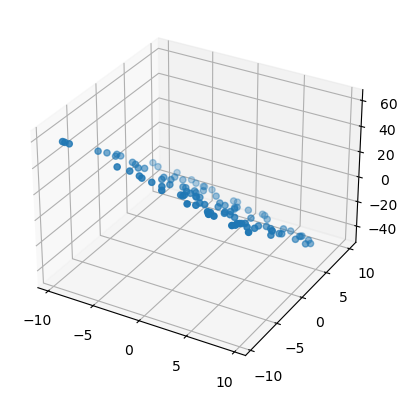

In [23]:
x = np.random.uniform(-10,10, (100, 2))
y = f(m,c,x) + np.random.uniform(-10,10, (1))
ax = plt.figure().add_subplot(projection='3d')
print(y.shape)
print(x[:,0].shape)
print(x[:,1].shape)
ax.scatter(x[:,0], x[:,1], y)

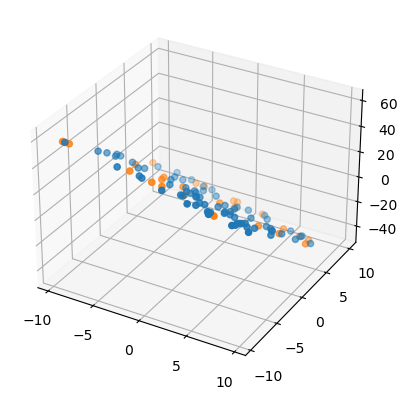

In [24]:
def test_train_split(x,y, splt):
    a =  np.split(np.column_stack((x, y)), [int(len(y)*splt), len(y)], axis = 0)
    train_x = a[0][:,0:x.shape[1]]
    train_y = a[0][:,x.shape[1]]
    test_x = a[1][:,0:x.shape[1]]
    test_y = a[1][:,x.shape[1]]
    return train_x, test_x, train_y, test_y

train_x, test_x, train_y, test_y = test_train_split(x,y,0.75)
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(train_x[:,0], train_x[:,1], train_y)
ax.scatter(test_x[:,0], test_x[:,1], test_y)

In [25]:
guess_m = np.random.uniform(-10,10, m.shape)
guess_c = np.random.uniform(-10,10, c.shape)
